In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

Populating the interactive namespace from numpy and matplotlib


#  OVERLAP EVOLUTION

In [2]:
simname="manifold_chain"
pfc=load(simname+"/pfc.npy")
Vs=load(simname+"/Vdynamics.npy")
G=load(simname+"/G.npy")
JH=load(simname+"/JH.npy")
J0=load(simname+"/J0.npy")


In [3]:
def K(x1,x2,L):
    d=x1-x2
    if d>float(L)/2.0:
        d=d-L
    elif d<-float(L)/2.0:
        d=d+L
    return np.exp(-abs(d))
    
def overlap(V,pos):
    m=0
    for i in range(len(V)):
        for j in range(i):
            m=m+V[i]*V[j]*K(pos[i],pos[j],10.0)
    M=len(V)*(len(V)-1)/2.0
    m=m/M
    return m
            
def centerOfMass(V,pos):
    ro=0
    for i in range(len(V)):
        ro=ro+V[i]*pos[i]
    ro=ro/float(len(V))
    return ro

def peakPosition(V,pos):
    peak=pos[argmax(V)]
    return peak

In [4]:
time=range(len(Vs))
ms=np.zeros((len(Vs),len(G)))
coms=np.zeros((len(Vs),len(G)))
for i in range(len(Vs)):
    for j in range(len(G)):
        ms[i][j]=overlap(Vs[i],pfc[j])
        coms[i][j]=centerOfMass(Vs[i],pfc[j])
    if i%10==0:
        print("timestep: "+str(i))

timestep: 0
timestep: 10
timestep: 20
timestep: 30
timestep: 40
timestep: 50
timestep: 60
timestep: 70
timestep: 80
timestep: 90
timestep: 100
timestep: 110
timestep: 120
timestep: 130
timestep: 140
timestep: 150
timestep: 160
timestep: 170
timestep: 180
timestep: 190


In [5]:
#save overlaps
np.save("manifold_chain/overlaps",ms)
np.save("manifold_chain/center_of_mass",coms)

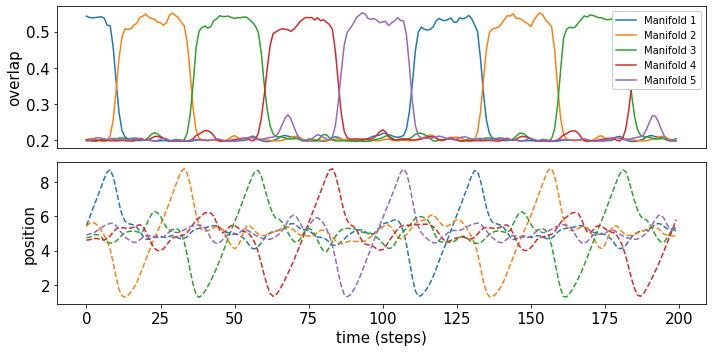

In [35]:
fig=figure(figsize=(10,5))
ax1=subplot(2,1,1)

yticks(fontsize=15)
ax2=subplot(2,1,2)
xticks(fontsize=15)
yticks(fontsize=15)
time=arange(len(ms))
for i in range(len(ms.T)):
    ax1.plot(time,ms.T[i],label="Manifold "+str(i+1))
    ax2.plot(time,coms.T[i],linestyle="--")
ax2.set_xlabel("time (steps)",fontsize=15)
ax1.set_ylabel("overlap",fontsize=15)
ax2.set_ylabel("position",fontsize=15)
ax1.legend(loc="upper right",framealpha=1)
ax1.set_xticks([])
tight_layout()
#savefig("manifold_chain.svg")